<a href="https://colab.research.google.com/github/BrianHall1992/LAGCC-P1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all the packages we'll be using, as well as the raw data. When describing, we see that not all the columns are described, many of the values are 's's instead of numbers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:

df= pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.describe()




,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


###Removed the rows from the dataset with 's' instead of numerics, and converted the Mean Score to numeric

In [4]:
df2=df[df['Mean Score']!='s']
df2['Mean Score'] = pd.to_numeric(df2['Mean Score'])

df2['Mean Score'].dtype ##137109 rows, removed all the 's'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('float64')

##After deciding I was curious about High School Mean scores, and how they vary year over year, I subset the dataframe and create a boxplot for each year. 2017 has the highest median score, and the lowest variability at around 65

[Text(0, 0, '2015'), Text(0, 0, '2016'), Text(0, 0, '2017')]

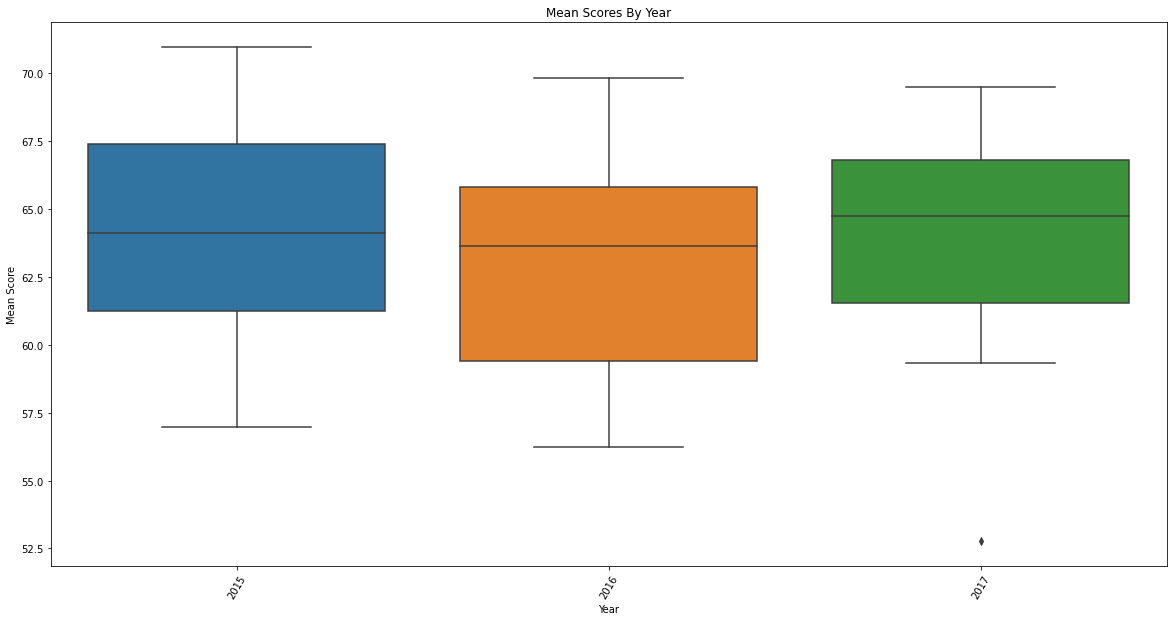

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
df_high= df2[(df2['School Level']=='High school')]
df_years = df_high.groupby(['Year','Regents Exam'], as_index=False)['Mean Score'].mean()
g=sns.boxplot(data=df_years, x='Year',y='Mean Score', ax=ax)
plt.title('Mean Scores By Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


In [ ]:
g=sns.boxplot(data=df_years, x='Regent Exam',y='Mean Score', ax=ax)
plt.title('Mean Scores By Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

##Next I was interested in exploring Stuyvesant, as it's one of the most famous high schools in the country. As expected, it has much higher Mean Scores than the NY topline.While 2015 has the highest Median, it also has the most variability, with several notable low outliers.

[Text(0, 0, '2015'), Text(0, 0, '2016'), Text(0, 0, '2017')]

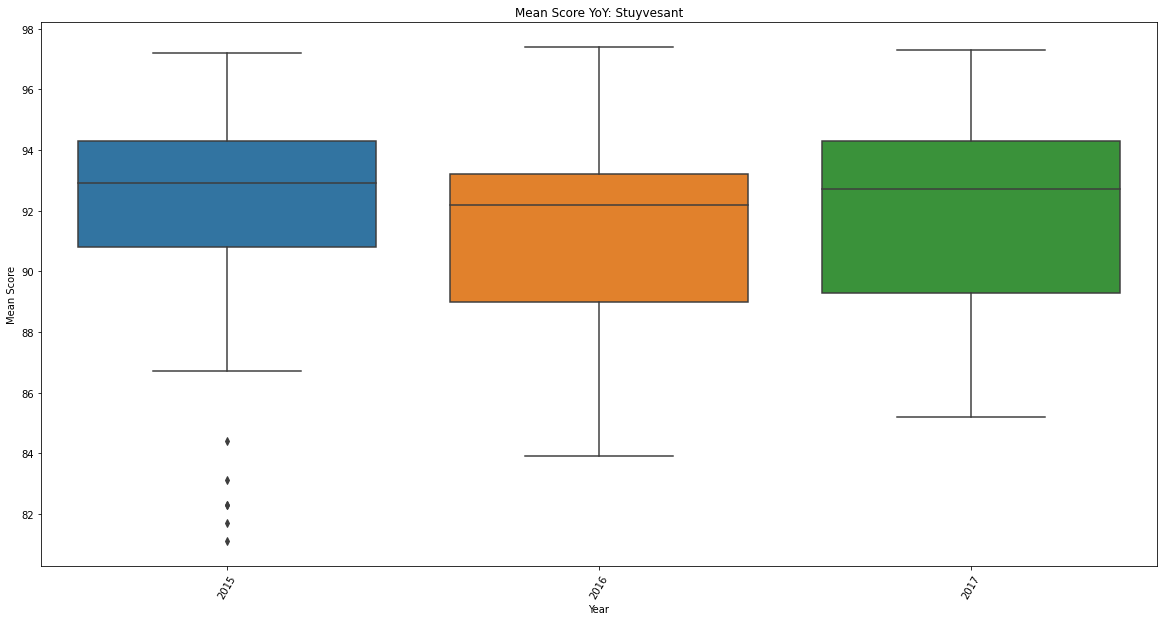

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
df_stuy = df2[(df2['School Name']=='Stuyvesant High School') & (df2['School Level']=='High school')]
df_sty_years = df_stuy.groupby(['Year','Regents Exam'], as_index=False)['Mean Score'].mean()
b= sns.boxplot(data=df_stuy, x='Year',y='Mean Score', ax=ax)
plt.title('Mean Score YoY: Stuyvesant')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)



##By Filtering on 2015, and looking at the variability by Regents Exam, we can see that those lower scores are driven by Common Core Algebra, which comes in at a low of 81.Compared to the 2015 breakout for total NY, seen below, the Stuyvesant minimum for this subject is still higher than the median for 2015. 

[Text(0, 0, 'Algebra2/Trigonometry'),
 Text(0, 0, 'Common Core Algebra'),
 Text(0, 0, 'Common Core Geometry'),
 Text(0, 0, 'English'),
 Text(0, 0, 'Geometry'),
 Text(0, 0, 'Global History and Geography'),
 Text(0, 0, 'Integrated Algebra'),
 Text(0, 0, 'Living Environment'),
 Text(0, 0, 'Physical Settings/Chemistry'),
 Text(0, 0, 'Physical Settings/Physics'),
 Text(0, 0, 'U.S. History and Government')]

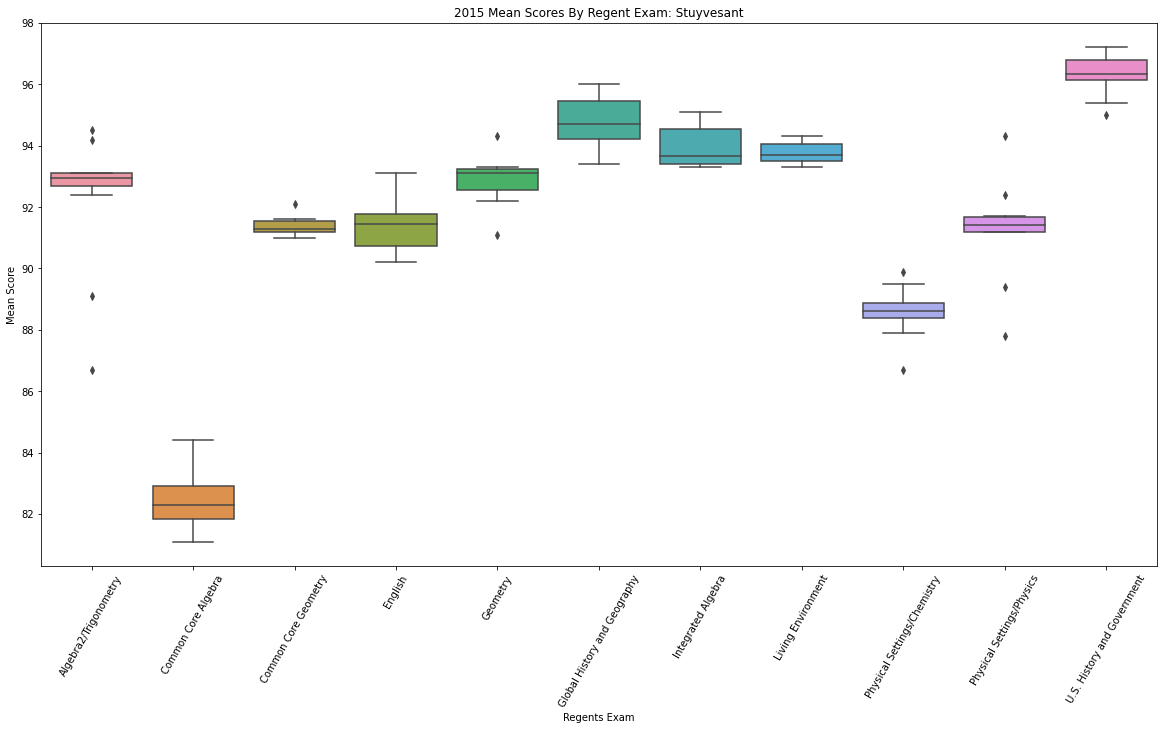

In [7]:
df_stuy2 = df2[(df2['School Name']=='Stuyvesant High School') & (df2['School Level']=='High school')&(df2['Year']==2015)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=df_stuy2, x= 'Regents Exam', y= 'Mean Score', ax=ax)
plt.title('2015 Mean Scores By Regent Exam: Stuyvesant')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


In [12]:
df_stuy2.groupby(['Regents Exam'])['Mean Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regents Exam,,,,,,,,
Algebra2/Trigonometry,12.0,92.308333,2.201016,86.7,92.700,92.95,93.100,94.5
Common Core Algebra,6.0,82.483333,1.153112,81.1,81.850,82.30,82.900,84.4
Common Core Geometry,7.0,91.414286,0.362531,91.0,91.200,91.30,91.550,92.1
English,10.0,91.370000,0.899444,90.2,90.725,91.45,91.775,93.1
Geometry,7.0,92.871429,0.997855,91.1,92.550,93.10,93.250,94.3
Global History and Geography,12.0,94.741667,0.851158,93.4,94.225,94.70,95.450,96.0
Integrated Algebra,8.0,93.987500,0.739570,93.3,93.400,93.65,94.550,95.1
Living Environment,7.0,93.771429,0.381725,93.3,93.500,93.70,94.050,94.3
Physical Settings/Chemistry,12.0,88.591667,0.798246,86.7,88.400,88.60,88.875,89.9


[Text(0, 0, 'Common Core Algebra'),
 Text(0, 0, 'Common Core English'),
 Text(0, 0, 'Common Core Geometry'),
 Text(0, 0, 'English'),
 Text(0, 0, 'Geometry'),
 Text(0, 0, 'Global History and Geography'),
 Text(0, 0, 'Integrated Algebra'),
 Text(0, 0, 'Living Environment'),
 Text(0, 0, 'Physical Settings/Earth Science'),
 Text(0, 0, 'U.S. History and Government'),
 Text(0, 0, 'Algebra2/Trigonometry'),
 Text(0, 0, 'Physical Settings/Chemistry'),
 Text(0, 0, 'Physical Settings/Physics')]

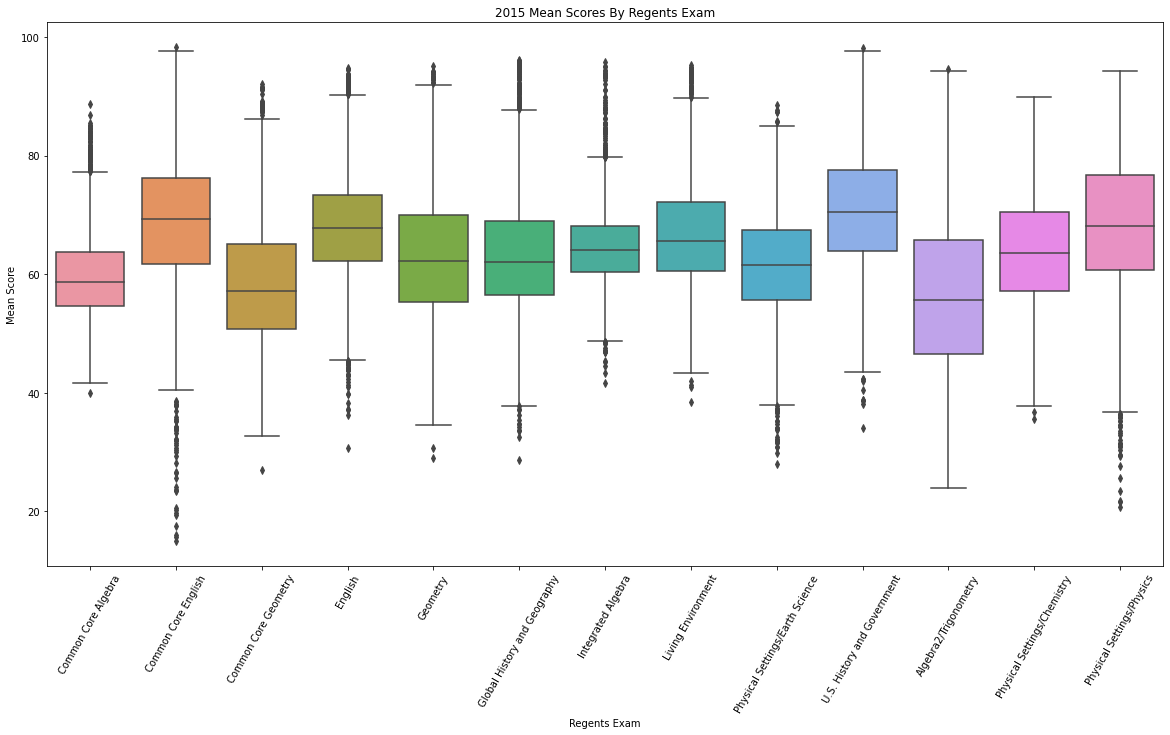

In [27]:
df_15 = df2[(df2['School Level']=='High school')&(df2['Year']==2015)]
fig, ax = plt.subplots(figsize=(20, 10))
g=sns.boxplot(data=df_15, x='Regents Exam',y='Mean Score', ax=ax)
plt.title('2015 Mean Scores By Regents Exam')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)